# Predicting Diabetes Diagnosis Using Health Factors
Authors: Abby Howard, Arai Lubas, Ella Stasko

Check In One

# Introduction
We are interested in exploring what combination of the collected features best predicts whether an individual has diabetes. Given these inputs, we want to determine whether we can create a model to predict this accurately.

Our team will use the Healthcare Diabetes Dataset from Kaggle. Each instance represents an individual’s health data with features relevant to Diabetes outcomes. It was last updated in 2023, meaning the data is recent and relevant. The dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK). There are 2768 patients included in the data, with 10 features recorded. Each instance represents a unique individual with recorded features listed below:

1.	Id: Unique identifier for each data entry.
3.	Pregnancies: Number of times pregnant. (Includes people who cannot get pregnant).
4.	Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
5.	BloodPressure: Diastolic blood pressure (mm Hg).
6.	SkinThickness: Triceps skinfold thickness (mm). Indicator of body fat distribution.
7.	Insulin: 2-Hour serum insulin (mu U/ml).
8.	BMI: Body mass index (weight in kg / height in m^2).
9.	DiabetesPedigreeFunction: Diabetes pedigree function, a genetic score of diabetes.
10.	Age: Age in years.
11.	Outcome: Binary classification indicating the presence (1) or absence (0) of diabetes.
   
Features we are particularly interested in to predict whether the individual has diabetes are glucose, diabetes pedigree function, and insulin features. We are surprised by the skin thickness and intrigued to determine whether this has any predictive value. 


# Exploratory Data Analysis

In [31]:
#import needed modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore', category=FutureWarning)

# Summary Statistics

First we need to read in our data, and confirm there are no missing values in the data. 

In [ ]:
# Read in the dataset
data = pd.read_csv('Healthcare-Diabetes.csv', index_col= 'Id')

#check for na 
data.isna().any()

We noticed that there are multiple columns with an abundant amount of zeros for qualities that cannot equal zero (age, BMI, Insulin etc.) To understand how vast the missing values are for each column, we will quantify how many zeroes are in each column. 

In [41]:
# See how many zero counts for each column
(data == 0).sum()

Pregnancies                  412
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1816
dtype: int64

We can assume that the zeroes for Insulin, Skin Thickness, BMI, Blood Pressure are missing values; the cells below removes those rows, and keeps zeroes for the Pregnancies and Outcomes columns as they represent binary values. 

In [46]:
# For data analysis, create DataFrames for each variable against outcome,
# removing zero values to assess trends via violin plots
        
dataframes = {} 

for col in data:
    if col == 'Pregnancies':
        dataframes[col] = data.loc[:, (col, 'Outcome')]
    if col == 'Outcome':
        pass
    else:
        dataframes[col] = data.loc[:, (col, 'Outcome')].query('`{}` != 0'.format(col))
        
#Check the for loop was correct
dataframes['Pregnancies'].head()

,Pregnancies,Outcome
Id,,
1,6,1
2,1,0
3,8,1
4,1,0
6,5,0


In [ ]:
# Cleaned data with no zero values for any row 
cleaned_data = data.query('Glucose !=0 & BloodPressure !=0 & SkinThickness' 
                          '!=0 & Insulin !=0')

Now we will take a look at the number of participants in the dataset.

In [49]:
#Count the number of participants in the cleaned sample
cleaned_data.shape

(1431, 9)

With 1431 participants left in the cleaned data, and 9 columns of health features, lets visualize some key aspects of our data set. 

Text(0.5, 1.0, 'Number of Pregnancies of Participants in Dataset')

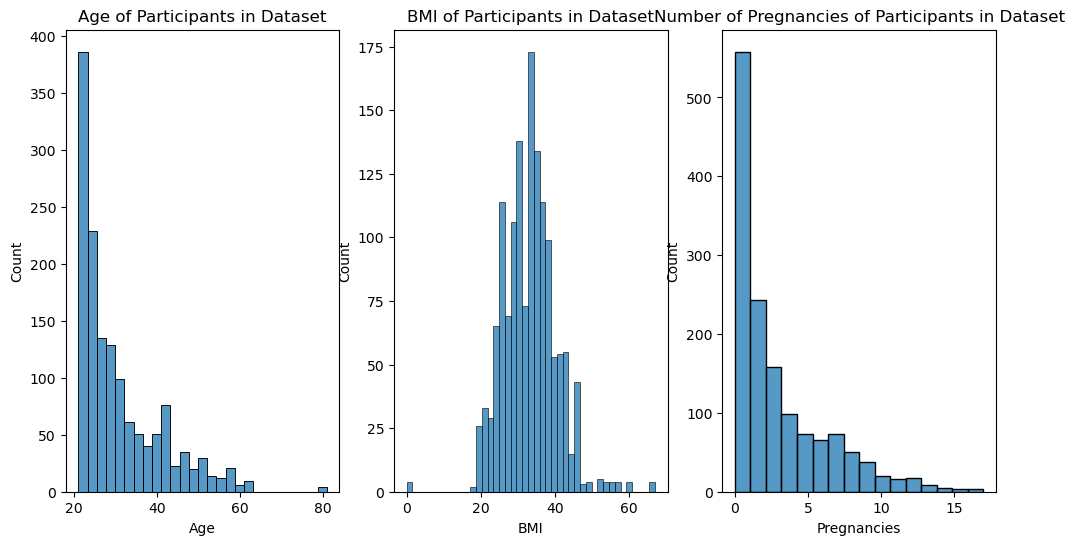

In [61]:
#Plot the Age Distribution of participants in a subplot
plt.figure(1, figsize = (12,6), clear = True)
plt.tight_layout()
plt.subplot(1,3,1)
sns.histplot(cleaned_data, 
              x = 'Age')
plt.title('Age of Participants in Dataset')

#plot the BMI distribution of Participants in a sub plot
plt.subplot(1,3,2)
sns.histplot(cleaned_data, 
              x = 'BMI')
plt.title('BMI of Participants in Dataset')

#plot the Distribution of the number of pregnancies in a subplot
plt.subplot(1,3,3)
sns.histplot(cleaned_data, 
              x = 'Pregnancies',
              bins = 16)
plt.title('Number of Pregnancies of Participants in Dataset')


Participants in the data set have a normal distribution of BMI, and a right skew of both age and number of pregnancies. It is important to note that the pregancies column includes men and those who cannot become pregnant, resulting in a very high number of zero pregnancies. 

This is relevant because diabetes is known to be correlated with pregnancy, but without the differentiation in sex of a patient, it wll be difficult to determine which individuals are women/those with a uterus who have not been pregnant, or a man/those who do not have a uterus. This may eliminate the potential to examine the impact of pregnancy on diabetes diagnosis

Next, let's examine known diagnoses of diabetes. 

Text(0.5, 1.0, '2-Hour Insulin Serum by Diabetes Diagnosis')

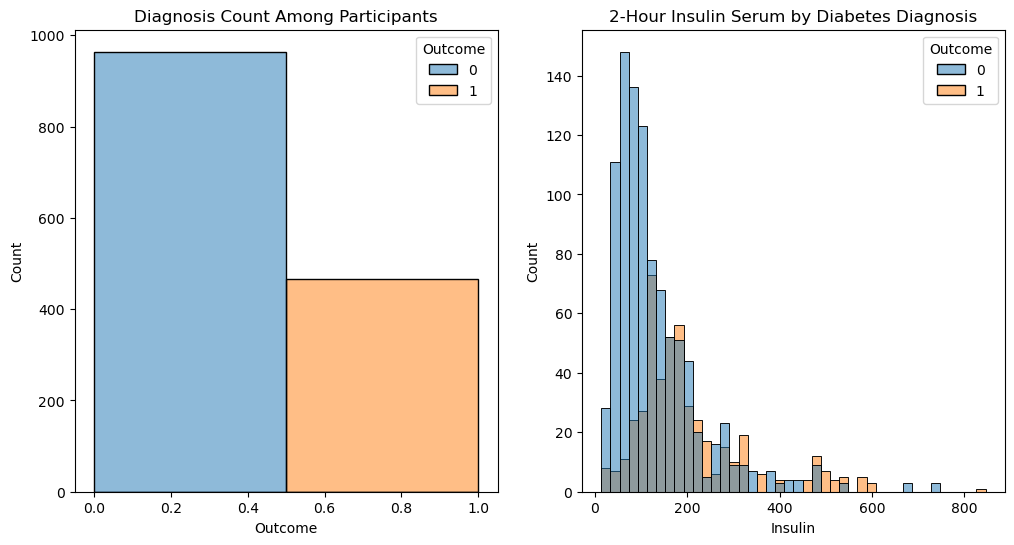

In [64]:
#Plot the number of participants with diabetes
plt.figure(2, figsize = (12,6), clear = True)
plt.subplot(1,2,1)
sns.histplot(cleaned_data, 
              x = 'Outcome',
              hue = 'Outcome',
              bins = 2)
plt.title('Diagnosis Count Among Participants')

#plot insulin levels separated and color coded by Diabestes Diagnosis
plt.subplot(1,2,2)
sns.histplot(cleaned_data,
             x = 'Insulin',
             hue = 'Outcome')
plt.title('2-Hour Insulin Serum by Diabetes Diagnosis')

Here we see that there are about half as many participants with diabetes in the data set. In addition, the 2-Hour Insulin Serum has a right skew for those without diabetes, and a less intense right skew, to almost normal distribution among those with diabetes. This tells us that having a lower 2-Hour Insulin Serum concentration is correlated with healthier individuals. 

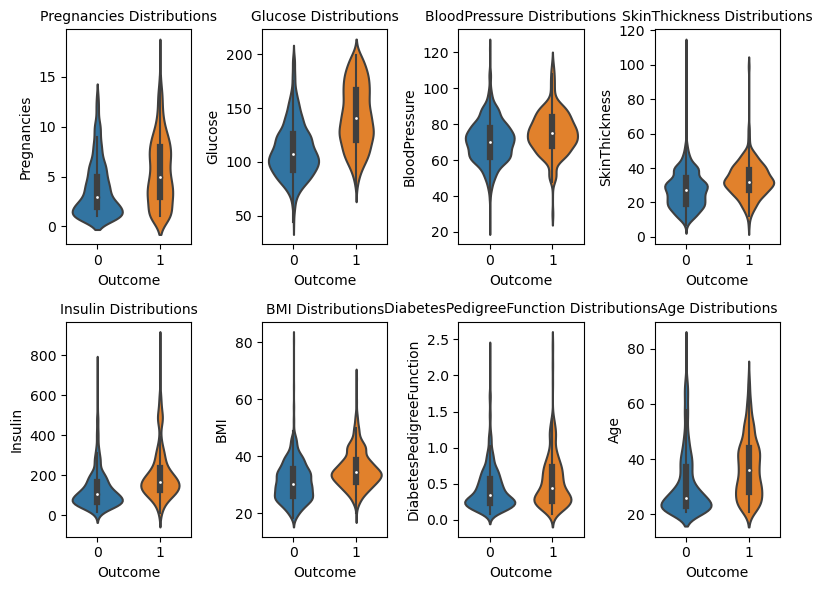

In [67]:
plt.figure(3, figsize = (8,6), clear = True)

subplot_num = 1

for key in dataframes:
    plt.subplot(2, 4, subplot_num)
    plt.title(f"{key} Distributions", size = 10)
    sns.violinplot(data = dataframes[key], y = key, x = 'Outcome')
    subplot_num +=1 

plt.tight_layout()

Text(0, 0.5, '2-Hour Serum Insulin mu U/mL')

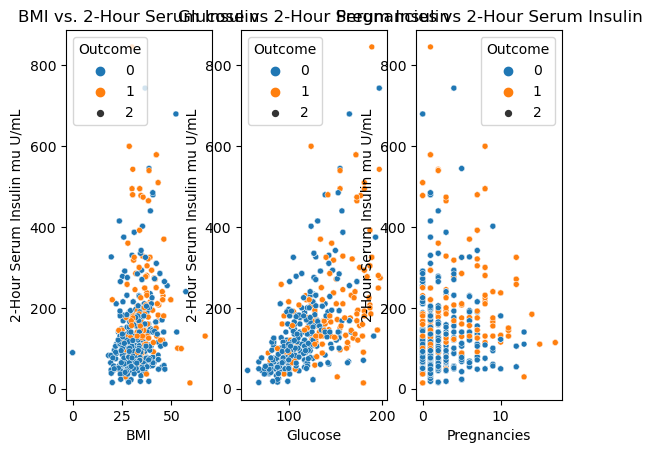

In [68]:

#Graph various variables vs. 2 Hour Serum Insulin 
plt.figure(4, clear = True)
plt.subplot(1,3, 1)

sns.scatterplot(x = 'BMI',
           y = 'Insulin',
           data = cleaned_data,
           hue = 'Outcome',
           size = 2)

plt.title('BMI vs. 2-Hour Serum Insulin')
plt.xlabel('BMI')
plt.ylabel('2-Hour Serum Insulin mu U/mL')

plt.subplot(1,3, 2)
sns.scatterplot(x = 'Glucose',
           y = 'Insulin',
           data = cleaned_data,
           hue = 'Outcome',
           size = 2)

plt.title('Glucose vs 2-Hour Serum Insulin')
plt.xlabel('Glucose')
plt.ylabel('2-Hour Serum Insulin mu U/mL')

plt.subplot(1,3, 3)
sns.scatterplot(x = 'Pregnancies',
           y = 'Insulin',
           data = cleaned_data,
           hue = 'Outcome',
           size = 2 )

plt.title('Pregnancies vs 2-Hour Serum Insulin')
plt.xlabel('Pregnancies')
plt.ylabel('2-Hour Serum Insulin mu U/mL')